# Chenyu Zhao
#### R version: 3.5.1

# MTH9879 Homework 6

Assigned: March 14, 2019.
Due: March 28, 2019 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this Jupyter notebook to Yassine Ghalane (yassine.ghalem@gmail.com), Victor Istrakov (stavka@gmail.com), and Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or Jupyter notebook, please contact your TAs.

### 0. (0 points) 
Read the review article by McAleer and Medeiros and also the nice article by Barndorff-Nielsen et al.

## Comparison of estimators

### Set up R environment.

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tq.zip", destfile="tq.zip")
unzip(zipfile="tq.zip")
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/RvEstimators.R.zip", destfile="RvEstimators.R.zip")
unzip(zipfile="RvEstimators.R.zip")

### 1. (12 points) 
This assignment uses the *tqBAC* dataset from *tq.rData* and the RV estimators from *RvEstimators.R*.

Note that the dataset used in this exercise is different from the one in Lecture 6. 

In [1]:
load('tq.rData')
source('RvEstimators.R')
library(highfrequency)

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



(a) Consider the BAC trade price series.  Superimpose signature plots of the following estimators with subsampling frequency $q$ from 1 to 20: TSRV, MSRV, KRVTH, KRVC.  Express your results as $\sqrt{RV}$ to make them more intuitive, note that volatility estimates should be of the order of $2\%$!
<br>
Pay attention to good aesthetics, addling a proper legend to your plot.

(b) Repeat part (a) for the BAC mid-quote series.

(c) Which of these estimators do you recommend and why?  What sub-sampling frequency do you recommend based on these pictures?

### Answer 

(a)

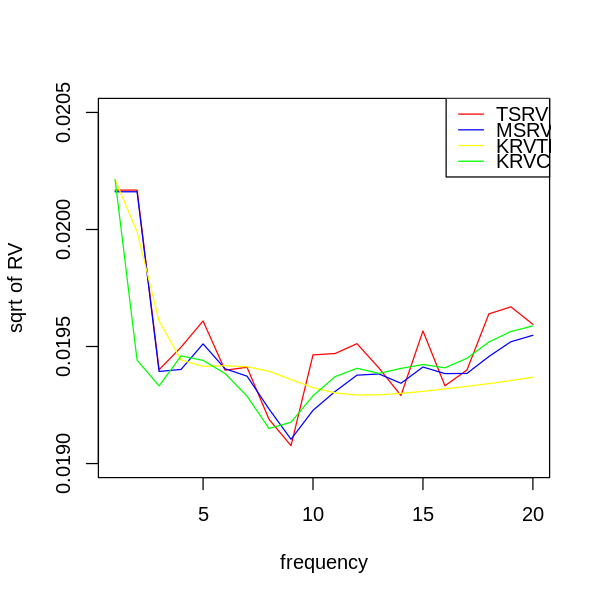

In [3]:
p=log(as.numeric(tqBAC$PRICE))

library(repr)
options(repr.plot.width=5,repr.plot.height=5)

tsrv<-sapply(1:20,function(q){sqrt(TSRV(p,q))})
msrv<-sapply(1:20,function(q){sqrt(MSRV(p,q))})
krvth<-sapply(1:20,function(q){sqrt(KRVTH(p,q))})
krvc<-sapply(1:20,function(q){sqrt(KRVC(p,q))})

plot(1:20, tsrv, col="red", type='l', ylab='sqrt of RV', xlab='frequency',ylim=c(0.019, 0.0205))
lines(msrv,col="blue")
lines(krvth,col="yellow")
lines(krvc,col="green")
legend("topright",c("TSRV","MSRV","KRVTH","KRVC"),lty = c(1,1,1,1),col=c("red","blue","yellow","green"))

(2)

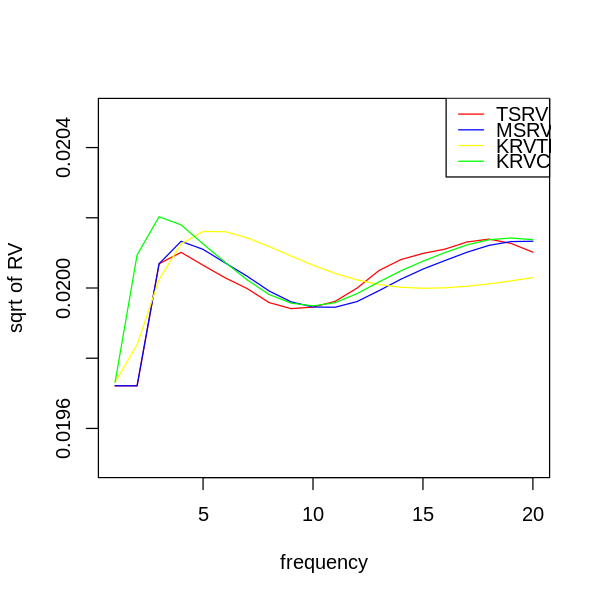

In [4]:
p=log((as.numeric(tqBAC$BID)+as.numeric(tqBAC$OFR))/2)

tsrv<-sapply(1:20,function(q){sqrt(TSRV(p,q))})
msrv<-sapply(1:20,function(q){sqrt(MSRV(p,q))})
krvth<-sapply(1:20,function(q){sqrt(KRVTH(p,q))})
krvc<-sapply(1:20,function(q){sqrt(KRVC(p,q))})

plot(1:20, tsrv, col="red", type='l', ylab='sqrt of RV', xlab='frequency',ylim=c(0.0195, 0.0205))
lines(msrv,col="blue")
lines(krvth,col="yellow")
lines(krvc,col="green")
legend("topright",c("TSRV","MSRV","KRVTH","KRVC"),lty = c(1,1,1,1),col=c("red","blue","yellow","green"))

(c)

I recommend KRVTH estimator because it is smooth and it converges fast.

For the optimal sub-sampling frequency, I recommend 14. Because when q is around 14, the curve reaches its minimum.

<font color="red">Comment: why minimum ? you need relative stability, which starts at 5. -2pt</font>

## The Epps effect

### 2. (14 points) 
For this assignment, use the *tqBAC* and  *tqC* datasets from *tq.rData*, the function *getSymbols* from the ``quantmod`` package, and the function *aggregatets* from the `` highfrequency`` package.

In [5]:
#install.packages('quantmod')

In [2]:
load('tq.rData')
library(highfrequency)
library(quantmod)

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘quantmod’

The following objects are masked from ‘package:highfrequency’:

    getPrice, has.Qty



(a) Write a function to aggregate a *tq* object (such as *tqBAC*) to the nearest $k$ seconds. <br>
(Hint: Use the function *aggregatets(.)*).

(b) Write a function to compute the correlation between two high-frequency log return series (in *tq* format) where the underlying prices have been aggregated to the nearest $k$ seconds.

(c) Plot the correlation between BAC and C returns where these returns are sampled every $k$ seconds, with $ k  \in \{2,3,4,. .., 599,600\} $.  Use a kernel smoothing function such as *ksmooth* to smooth your results.  Make sure the aesthetics are good with nice labels etc.

(d)  Is your plot consistent with the Epps effect?  What was the intraday correlation between BAC and C returns on 04-May-2012?

(e) Use the function *getSymbols* from ``quantmod`` to download daily data for BAC and C from 01-Jan-2012 to 31-Dec-2012.  What was the historical correlation of daily BAC and C returns over that period?

### Answer

(a)

In [7]:
aggregateSeconds <- function(tq, k){
    return (aggregatets(tq,on="seconds",k=k))
}

(b)

In [8]:
correlation <- function(tqa, tqb){
    return (cor(tqa,tqb))
}

(c)

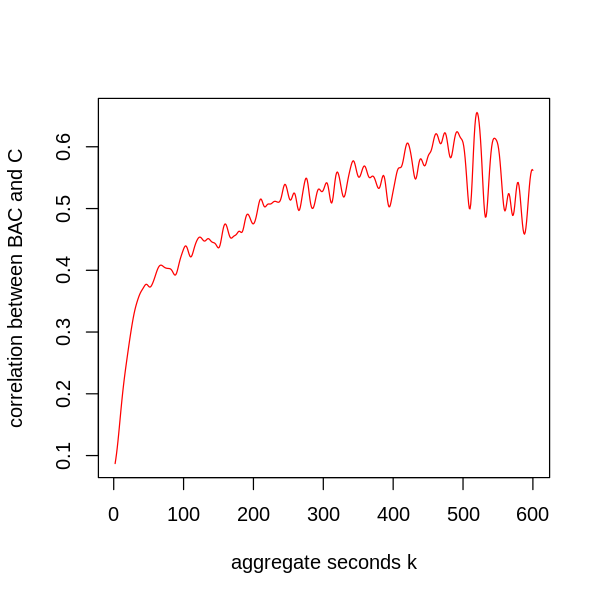

In [9]:
helper <- function(k){
    p1=diff(log(as.numeric(aggregateSeconds(tqBAC, k)$PRICE)))
    p2=diff(log(as.numeric(aggregateSeconds(tqC, k)$PRICE)))
    return (correlation(p1,p2))
}
plot(2:600, ksmooth(2:600, sapply(2:600, function(k){helper(k)}), "normal", bandwidth = 10)$y,
     col="red", type = "l", ylab="correlation between BAC and C",xlab="aggregate seconds k")

(d)

It is consistent with the Epps effect. Because the higher the frequency, the lower the k, and in the plot, the lower the estimator.

Becaues the data is only on 04-May-2012, we just need to choose a proper k to calculate the whole data set's correlation to get intra-day correlation. We use plain estimator, thus k = 2, then correlation is 0.0429915308421487. This number is calculated in the following cell.

<font color="red">Comment: intraday does not mean k=2, you can see from the graph that correlation is about 0.5 -2pt</font>

In [10]:
helper(2)

[1] 0.04299153

(e)

In [11]:
getSymbols("BAC", src = "yahoo", from = "2012-01-01", to = "2012-12-31")
getSymbols("C"  , src = "yahoo", from = "2012-01-01", to = "2012-12-31")

p1<-diff(log(as.numeric(BAC$BAC.Adjusted)))
p2<-diff(log(as.numeric(C$C.Adjusted)))

correlation(p1,p2)

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Please see the Warning section of ‘?getSymbols.yahoo’ for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


[1] "BAC"

[1] "C"

[1] 0.7996266

The historical correlation of daily BAC and C is 0.799626564638871

## The Hayashi-Yoshida estimator

### 3. (2 points) 
Show that when two time series $p^{(1)}$ and $p^{(2)}$ are synchronous, the Hayashi-Yoshida estimator coincides with the realized covariance estimator.

### Answer

The Hayashi-Yoshida estimator is

$$
HY_t=\sum_{i\le t} \sum_{j\le t}(p_i^{(1)}-p_{i-1}^{(1)})(p_j^{(2)}-p_{j-1}^{(2)})\nu_{ij}
$$

where $\nu_{ij}$ is indicator for synchronous. When they are synchronous, this indicator is always 1 for $i=j$, and 0 otherwise.

So
$$
HY_t=\sum_{i\le t} \sum_{j\le t}(p_i^{(1)}-p_{i-1}^{(1)})(p_j^{(2)}-p_{j-1}^{(2)})\nu_{ij}=\sum_{i\le t} \Delta p_i^{(1)}\Delta p_i^{(2)}
$$

If we take the average and gives $t=T$, 
$$
HY_t=\frac{1}{T}\sum_{i=1}^{T} \Delta p_i^{(1)}\Delta p_i^{(2)}
$$

This coincides with the realized covariance estimator.

## Fulvio Corsi's HAR-RV model

The following code loads the data of SPX realized volatility required for this problem. Data were downloaded from the Oxford-Man website

In [3]:
#download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/spx_krv.rData_.zip", destfile="spx_krv.zip")
#unzip(zipfile="spx_krv.zip")
load("spx_krv.rData")

In [13]:
head(spx.krv)

                   [,1]
2000-01-03 0.0001607266
2000-01-04 0.0002643965
2000-01-05 0.0003046503
2000-01-06 0.0001485821
2000-01-07 0.0001232670
2000-01-10 0.0001306934

### 4. (12 points)

(a) Rerun the HAR-RV example code using the 2008 *DJI_RV* sample from the ``highfrequency`` package.

(b) Repeat the analysis of part (a) with *spx.krv* restricted to 2008.

(c) Tabulate the HAR-RV coefficients for the two 2008 datasets.  Are they similar or do they differ?  Is most weight on the 1-day, 5-day, or 22-day RV?

(d) Using ``quantmod`` download daily VIX data.  Subset this data to 2008 and plot ${\rm VIX}^2$.

(e)  Plot SPX RV and superimpose DJI RV for 2008. Superimpose a plot of $\text{VIX}^2$, adding a scale on the right hand axis (see how this is done in the lecture iPython notebook). Comment on the resulting plot.


### Answer 

(a)

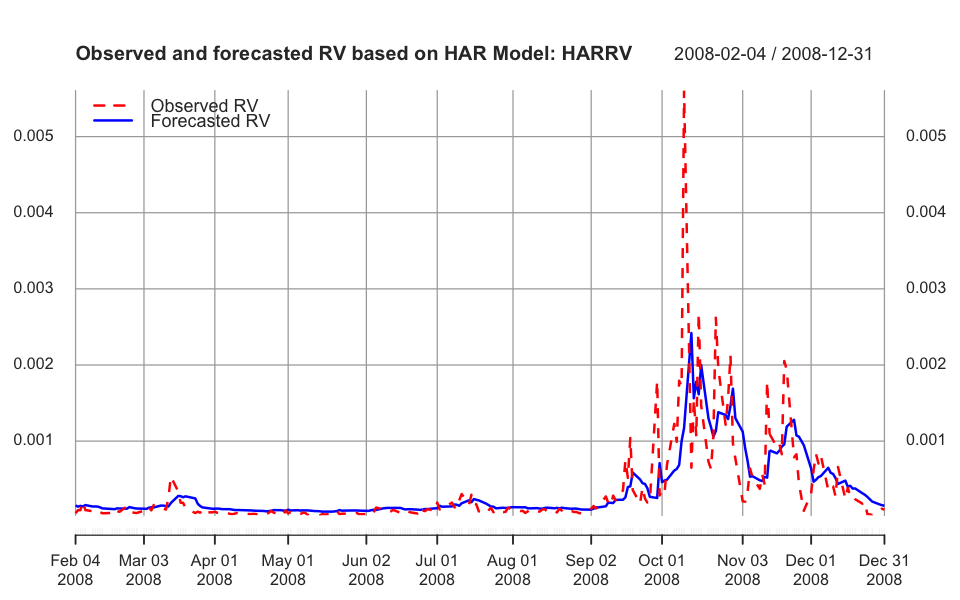

In [4]:
data(realized_library)
DJI_RV<-realized_library$Dow.Jones.Industrials.Realized.Variance; 

DJI_RV<-DJI_RV[!is.na(DJI_RV)]
DJI_RV<-DJI_RV['2008']

x <- harModel(data=DJI_RV , periods = c(1,5,22), RVest = c("rCov"), type="HARRV", h=1, transform=NULL)

options(repr.plot.width=8,repr.plot.height=5)
plot(x)

(b)

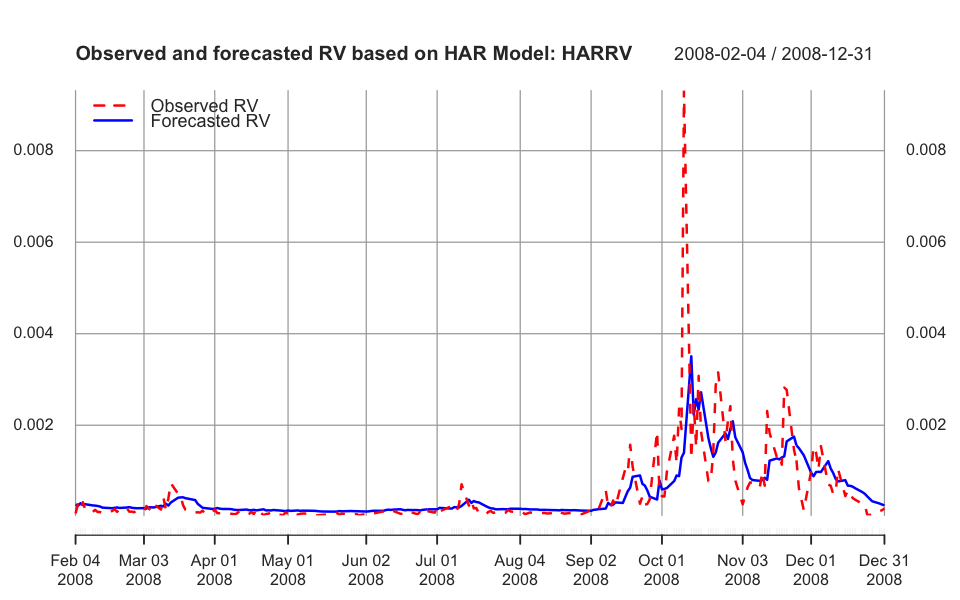

In [5]:
rv<-spx.krv[!is.na(spx.krv)]
rv<-rv['2008']

y <- harModel(data=rv , periods = c(1,5,22), RVest = c("rCov"), type="HARRV", h=1, transform=NULL)

plot(y)

(c)

In [6]:
summary(x)


Call:
"RV1 = beta0  +  beta1 * RV1 +  beta2 * RV5 +  beta3 * RV22"

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0017683 -0.0000626 -0.0000427 -0.0000087  0.0044331 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
beta0 4.432e-05  3.695e-05   1.200   0.2315    
beta1 1.586e-01  8.089e-02   1.960   0.0512 .  
beta2 6.213e-01  1.362e-01   4.560 8.36e-06 ***
beta3 8.721e-02  1.217e-01   0.716   0.4745    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0004344 on 227 degrees of freedom
Multiple R-squared:  0.4679,	Adjusted R-squared:  0.4608 
F-statistic: 66.53 on 3 and 227 DF,  p-value: < 2.2e-16


In [7]:
summary(y)


Call:
"RV1 = beta0  +  beta1 * RV1 +  beta2 * RV5 +  beta3 * RV22"

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0022396 -0.0001219 -0.0000725 -0.0000176  0.0079141 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
beta0 7.164e-05  5.960e-05   1.202  0.23067    
beta1 1.523e-01  8.218e-02   1.853  0.06526 .  
beta2 5.512e-01  1.415e-01   3.896  0.00013 ***
beta3 1.501e-01  1.324e-01   1.134  0.25801    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0006787 on 220 degrees of freedom
Multiple R-squared:  0.4096,	Adjusted R-squared:  0.4015 
F-statistic: 50.87 on 3 and 220 DF,  p-value: < 2.2e-16


|   Coef     |  DJI RV   |  SPX KRV  |
|------------|-----------|-----------|
| $intercept$  | 4.432e-05 | 7.164e-05 |
| $1-day$  | 1.586e-01 | 1.523e-01 |
| $5-day$  | 6.213e-01 | 5.512e-01 |
| $22-day$  | 8.721e-02 | 1.501e-01 |

They are similiar as coefficients are very close. The most weight is on 5-days.

(d)

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Please see the Warning section of ‘?getSymbols.yahoo’ for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


[1] "VIX"

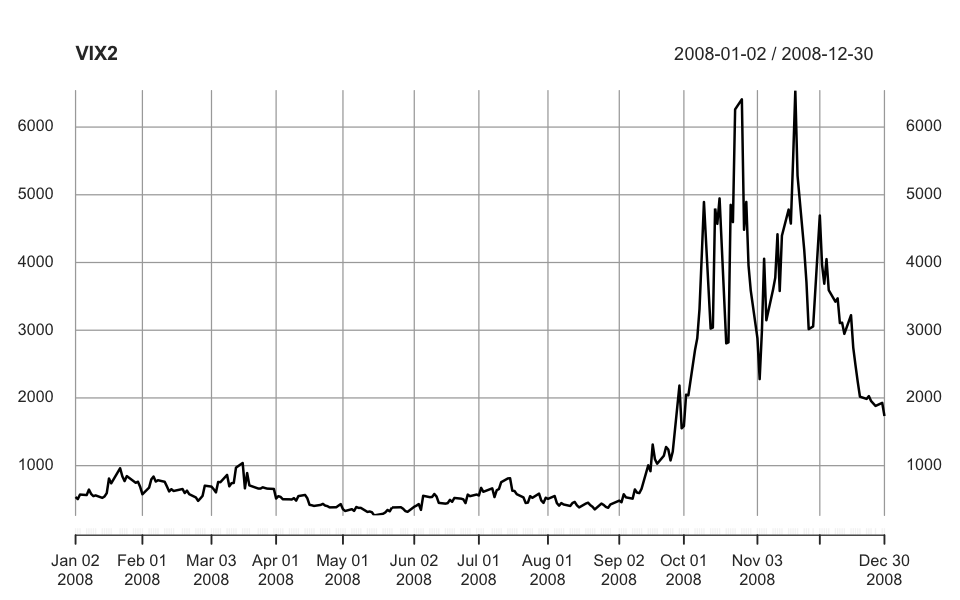

In [8]:
getSymbols("^VIX", src = "yahoo", from = "2008-01-01", to = "2008-12-31")
VIX2<-(VIX$VIX.Adjusted)^2
plot(VIX2,main="VIX2")

(e)

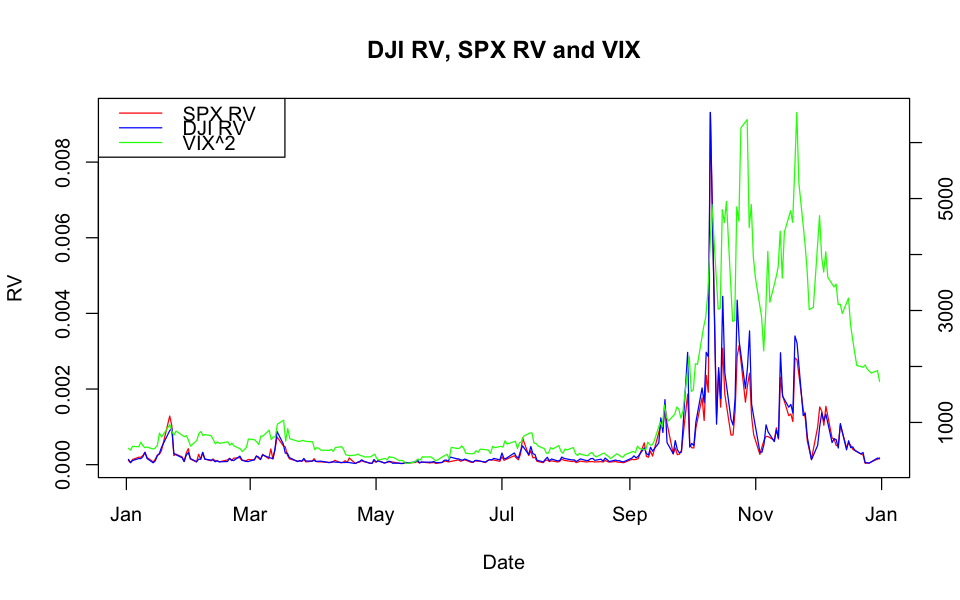

In [9]:
spx.krv<-spx.krv[!is.na(spx.krv)]
spx.krv<-spx.krv['2008']


plot(as.Date(rownames(as.data.frame(spx.krv))),spx.krv,main="DJI RV, SPX RV and VIX",ylab="RV",xlab="Date",
     type='l',col='red')

par(new = T)
plot(as.Date(rownames(as.data.frame(DJI_RV))), DJI_RV, type='l', col="blue", axes=F, main=NA, xlab=NA, ylab=NA)

par(new = T)
plot(as.Date(rownames(as.data.frame(VIX2))), VIX2, type='l', col="green", axes=F, main=NA, xlab=NA, ylab=NA)

# adding a scale on the right hand axis
axis(side = 4)
mtext(side = 4, line = 3, "VIX^2")
legend("topleft",legend=c("SPX RV ","DJI RV", "VIX^2"),lty = c(1,1,1),col=c("red", "blue", "green"))


Comment: VIX^2 is a good indicator for RV, as they are highly correlated.